![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

# **[Data Sprint #21 - Classification of Malware with PE headers](https://dphi.tech/practice/challenge/57)**

#### **Submission by [Joseph R. Laurel](https://dphi.tech/profile/josephlaurel/)**
#### Based on "Getting Started Code for Data Sprint #20 on DPhi" by Manish KC

# Loading Libraries

In [1]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# IMPORT GENERIC PACKAGES
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)}, palette="PiYG", style='white')

from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import confusion_matrix

# Loading Dataset

In [2]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/train_set_label.csv")

## Basic EDA

In [3]:
train_data.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,...,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,...,60601,2,1024,1048576,4096,1048576,4096,0,16,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   e_magic                      3888 non-null   int64  
 1   e_cblp                       3888 non-null   int64  
 2   e_cp                         3888 non-null   int64  
 3   e_crlc                       3888 non-null   int64  
 4   e_cparhdr                    3888 non-null   int64  
 5   e_minalloc                   3888 non-null   int64  
 6   e_maxalloc                   3888 non-null   int64  
 7   e_ss                         3888 non-null   int64  
 8   e_sp                         3888 non-null   int64  
 9   e_csum                       3888 non-null   int64  
 10  e_ip                         3888 non-null   int64  
 11  e_cs                         3888 non-null   int64  
 12  e_lfarlc                     3888 non-null   int64  
 13  e_ovno            

In [5]:
train_data.drop(['e_res', 'e_res2'], axis = 1, inplace=True)

In [6]:
#Describe the Categorical Features. Check if Number of Unique Values is as expected. 
train_data.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
count,3888.0,3888.000000,3888.000000,3888.0,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,...,3.888000e+03,3888.000000,3888.000000,3.888000e+03,3.888000e+03,3.888000e+03,3888.000000,3.888000e+03,3888.000000,3888.000000
mean,23117.0,148.252058,2.947016,0.0,3.967593,2.120885,65110.442901,16.851852,199.741255,0.001029,...,1.785479e+06,2.132202,9489.058899,2.008231e+06,1.072442e+04,2.065907e+06,5694.156379,3.151187e+04,15.972737,0.517490
std,0.0,591.610421,2.291419,0.0,0.357188,65.785975,5195.740601,1050.777490,1048.231580,0.039275,...,6.906378e+07,0.474741,14841.770405,4.682014e+06,8.256807e+04,4.397444e+06,6510.114435,1.342464e+06,0.648187,0.499758
min,23117.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,23117.0,144.000000,3.000000,0.0,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,0.000000e+00,2.000000,0.000000,1.048576e+06,4.096000e+03,1.048576e+06,4096.000000,0.000000e+00,16.000000,0.000000
50%,23117.0,144.000000,3.000000,0.0,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,7.894150e+04,2.000000,0.000000,1.048576e+06,4.096000e+03,1.048576e+06,4096.000000,0.000000e+00,16.000000,1.000000
75%,23117.0,144.000000,3.000000,0.0,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,2.128122e+05,2.000000,32768.000000,1.048576e+06,8.192000e+03,1.048576e+06,4096.000000,0.000000e+00,16.000000,1.000000
max,23117.0,37008.000000,144.000000,0.0,4.000000,4096.000000,65535.000000,65520.000000,65534.000000,2.000000,...,4.294967e+09,16.000000,37184.000000,3.355443e+07,2.097152e+06,3.355443e+07,65536.000000,6.342951e+07,16.000000,1.000000


In [7]:
# Check the ratio of malware to non-malware
train_data['class'].value_counts(normalize=True)

# No need to address any class imbalance

1    0.51749
0    0.48251
Name: class, dtype: float64

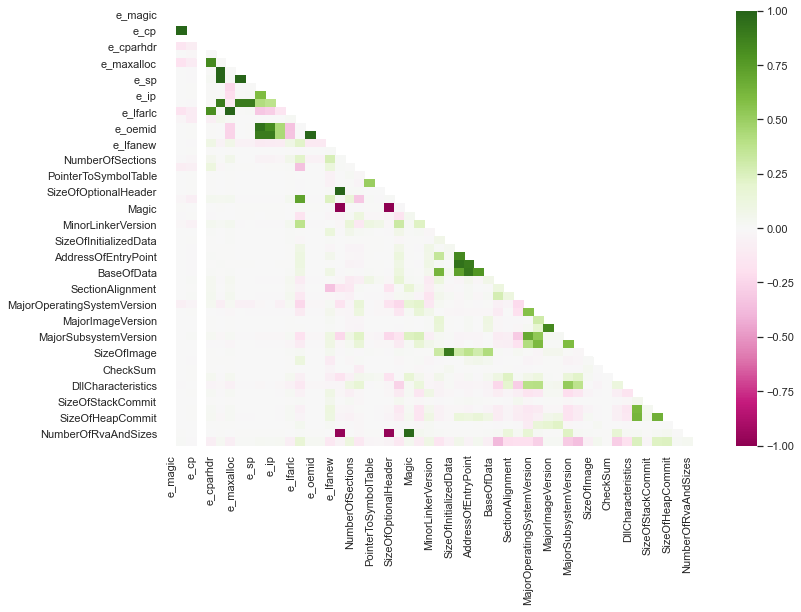

In [8]:
# Plot the heatmap showing the pairwise correlation variables
# Do not show self correlation

cor_matrix = train_data.corr()

mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cond = cor_matrix[(cor_matrix !=1.000)] # Other possible conditions: ((numCorr > .10) | (numCorr < -.10)) & (cor_matrix !=-1.000)
plt.figure(figsize=(12,8))
sns.heatmap(cond, mask=mask, cmap='PiYG')

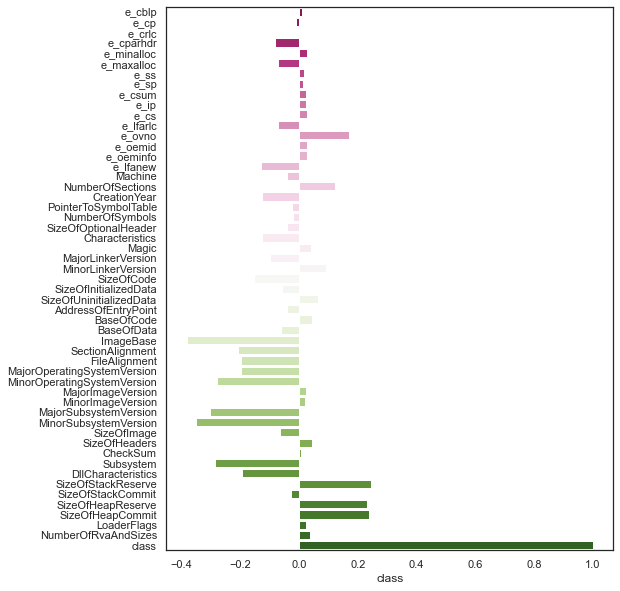

In [9]:
# Feature sorted by correlation to class, from positive to negative
top_corr = cor_matrix.sort_values('class')

plt.figure(figsize=(8,10))

sns.barplot(cor_matrix['class'][1:], cor_matrix.index[1:], orient='h', palette='PiYG')

plt.show()

In [ ]:
## Create a pairplot of the top features that are positively or negatively correlated with 'class'
#df_pair = train_data[['class','ImageBase', 'MinorSubsystemVersion','Subsystem','e_ovno','SizeOfStackReserve','SizeOfHeapReserve','SizeOfHeapCommit']]

#sns.pairplot(train_data, hue = 'class')

## Since there is no clear linear separability, we will not use logistic regression

# Separating Input Features and Output Features

In [10]:
# Input/independent variables
X = train_data.drop('class', axis = 1)   # here we are dropping the class feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = train_data['class']             # Output/Dependent variable

# Splitting the data into Train and Validation Set

In [11]:
import math

In [12]:
# Compute for train-test split based on the method of Guyon (1997)

print('Train-test split:', 1-(1/math.sqrt(len(X.columns))),'/',(1/math.sqrt(len(X.columns))))

Train-test split: 0.862639436051311 / 0.13736056394868904


In [13]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [14]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1/math.sqrt(len(X.columns))), random_state=42)

# Feature Scaling

In [40]:
#Import the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [41]:
#Instantiate the Scaler
scaler = MinMaxScaler()

#Fit to the TRAIN set
scaler.fit(X_train)

#Apply to the TRAIN set
X_train_s = scaler.transform(X_train)

#Apply to the TEST set
X_val_s = scaler.transform(X_val)

# Building Model

## Tuned Random Forest Model

### Hyperparameter Optimization

In [15]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

{'n_estimators': [200, 211, 222, 233, 244, 255, 266, 277, 288, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [16]:
# Import library for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import the RandomizedSearchCV library
from sklearn.model_selection import RandomizedSearchCV

In [17]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, verbose=3, random_state=42, n_jobs = -1)

#rf_random.fit(X_train, y_train)

## Show the Random Forest model with the best parameters
#rf_random.best_estimator_

### Model Validation
#### Testing

In [18]:
# Define best estimator
rf_best = RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       n_estimators=200)

rf_best2 = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=2,
                       n_estimators=222)

# Fit the random search model
rf_best2.fit(X_train, y_train)

# Get predictions 
rf_test = rf_best2.predict(X_val)

# Display predicted values
rf_test

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,

#### Performance Metrics

In [19]:
# Import library for accuracy score
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_val,rf_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       267
           1       0.98      1.00      0.99       268

    accuracy                           0.99       535
   macro avg       0.99      0.99      0.99       535
weighted avg       0.99      0.99      0.99       535



In [21]:
from sklearn.model_selection import cross_val_score

In [63]:
cv_rf = cross_val_score(rf_best2, X_train,y_train,cv=5, scoring='f1_macro')
print(cv_rf)
print(cv_rf.mean())

[0.97161116 0.98207799 0.98506898 0.98504851 0.97904398]
0.9805701255673134


Text(0.5, 39.5, 'Predicted label')

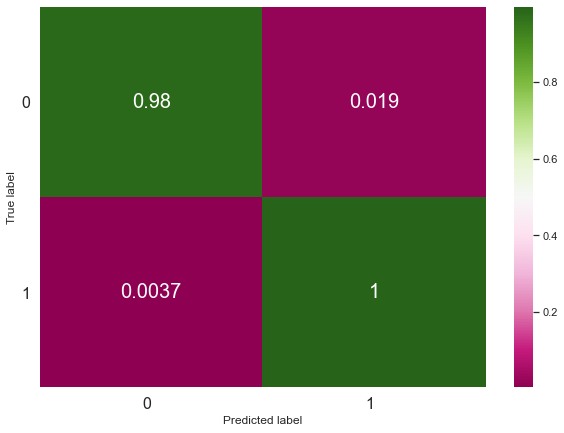

In [23]:
#Plot the confusion matrix
cm_RF_best = confusion_matrix(y_val, rf_test, normalize='true')

df_cm_RF_best = pd.DataFrame(cm_RF_best, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_RF_best = sns.heatmap(df_cm_RF_best,annot=True,annot_kws={"size": 20}, cmap='PiYG')

#Heatmap attributes
heatmap_RF_best.yaxis.set_ticklabels(heatmap_RF_best.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_RF_best.xaxis.set_ticklabels(heatmap_RF_best.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Tuned XGBoost Model

### Hyperparameter Optimization

In [24]:
# Set XGBoost hyperparameters for testing

paramsXGB={
 "learning_rate"    : [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 10, 12, 15, 18, 21, 24, 27, 30],
 "min_child_weight" : [ 0.5, 1, 3, 5, 7 ],
 "gamma"            : [ 0.2 , 0.3, 0.4, 0.5, 0.6 ],
 "colsample_bytree" : [ 0.1, 0.2, 0.3, 0.4, 0.5 ]
    
}

In [25]:
# Import xgboost library
import xgboost

In [26]:
# Instantiate the XGBoost classifier
xgb = xgboost.XGBClassifier()

# Instantiate the randomized search CV using the hyperparameters for testing
xgb_random=RandomizedSearchCV(xgb,param_distributions=paramsXGB,n_jobs=-1,cv=10,verbose=3, random_state=42)

In [27]:
## Perform the randomized search CV
#xgb_random.fit(X_train,y_train)

## Return the best XGBoost estimator
#xgb_random.best_estimator_

### Model Validation
#### Testing

In [28]:
# Define best estimator
xgb_best = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb_best2 = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=24,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Fit the random search model
xgb_best2.fit(X_train, y_train)

# Get predictions 
xgb_test = xgb_best2.predict(X_val)

# Display predicted values
xgb_test

[21:45:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,

#### Performance Metrics

In [29]:
print(classification_report(y_val,xgb_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       267
           1       0.97      0.99      0.98       268

    accuracy                           0.98       535
   macro avg       0.98      0.98      0.98       535
weighted avg       0.98      0.98      0.98       535



In [60]:
cv_xgb = cross_val_score(xgb_best2, X_train,y_train,cv=5, scoring='f1_macro')
print(cv_xgb)
print(cv_xgb.mean())

[22:33:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

Text(0.5, 39.5, 'Predicted label')

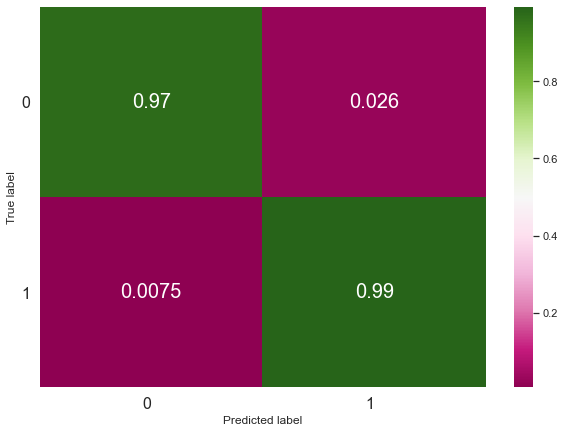

In [31]:
#Plot the confusion matrix
cm_xgb_best = confusion_matrix(y_val, xgb_test, normalize='true')

df_cm_xgb_best = pd.DataFrame(cm_xgb_best, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_xgb_best = sns.heatmap(df_cm_xgb_best,annot=True,annot_kws={"size": 20}, cmap='PiYG')

#Heatmap attributes
heatmap_xgb_best.yaxis.set_ticklabels(heatmap_xgb_best.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_xgb_best.xaxis.set_ticklabels(heatmap_xgb_best.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Tuned Support Vector Classifier
### Hyperparameter Optimization
Based on code by [Ken Jee](https://www.kaggle.com/kenjee/titanic-project-example)

In [32]:
# Import the Support Vector Classifier (SVC) library
from sklearn.svm import SVC

In [50]:
# Instantiate the SVC classifier
svc = SVC(probability = True)

# Set hyperparameters to test
param_grid_svc = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [1000, 1200, 1400, 1600, 1800]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [1000, 1200, 1400, 1600, 1800]}]

# Instantiate the randomized search CV using the hyperparameters for testing
clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid_svc, cv = 10, verbose = 3, n_jobs = -1, random_state=42)

In [51]:
## Perform the randomized search CV
#svc_random = clf_svc.fit(X_train_s,y_train)

## Show the best SVC estimator
#svc_random.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


SVC(C=1600, degree=4, kernel='poly', probability=True)

### Model Validation
#### Testing

In [97]:
# Define best estimator
svc_best = SVC(C=1000, gamma=1, probability=True)

svc_best2 = SVC(C=1600, degree=4, kernel='poly', probability=True)

# Fit the random search model
svc_best2.fit(X_train, y_train)

# Get predictions 
svc_test = svc_best2.predict(X_val)

# Display predicted values
svc_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

#### Performance Metrics

In [54]:
cv_svc = cross_val_score(svc_best, X_train, y_train,cv=5,scoring='f1_macro')
print(cv_svc)
print(cv_svc.mean())

[0.9432308  0.95519498 0.95817006 0.9536445  0.95206796]
0.9524616603496504


## Stacked Classifier
Based on code by [Frank Ceballos](https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840)

In [49]:
from mlxtend.classifier import StackingCVClassifier 

In [98]:
# Initialize the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [rf_best2, xgb_best2, svc_best],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [99]:
# Create list to store classifiers
classifiers = {"SVC": svc_best,
               "RF": rf_best2,
               "XGB": xgb_best2,
               "Stack": sclf}

In [101]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

[23:26:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

### Model Validation
#### Testing

In [71]:
cv_sclf = cross_val_score(sclf, X_train,y_train,cv=5, scoring='f1_macro')
print(cv_sclf)
print(cv_sclf.mean())

[22:49:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

## Tuned Stacking Classifier
### Hyperparameter Tuning

In [102]:
# Define parameter grid 
params_sclf = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize RandomizedSearchCV
random_sclf = RandomizedSearchCV(estimator = sclf, 
                    param_distributions = params_sclf, 
                    cv = 3,
                    verbose = 3,
                    n_jobs = -1,
                    random_state = 42)

# Fit RandomizedSearchCV
random_sclf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.5min finished


[23:33:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

RandomizedSearchCV(cv=3,
                   estimator=StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=False,
                                                                                      max_depth=60,
                                                                                      min_samples_leaf=2,
                                                                                      n_estimators=222),
                                                               XGBClassifier(base_score=0.5,
                                                                             booster='gbtree',
                                                                             colsample_bylevel=1,
                                                                             colsample_bynode=1,
                                                                             colsample_bytree=0.4,
                                                                             ga

In [103]:
# Show the best sclf estimator
random_sclf.best_estimator_

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=False,
                                                         max_depth=60,
                                                         min_samples_leaf=2,
                                                         n_estimators=222),
                                  XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.4, gamma=0.5,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.15,
                                                max_delta_step=0, max_depth=24,

### Model Validation
#### Testing

In [105]:
# Define best estimator
StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=False,
                                                         max_depth=60,
                                                         min_samples_leaf=2,
                                                         n_estimators=222),
                                  xgboost.XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.4, gamma=0.5,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.15,
                                                max_delta_step=0, max_depth=24,
                                                min_child_weight=1,
                                                monotone_constraints='()',
                                                n_estimators=100, n_jobs=4,
                                                num_parallel_tree=1,
                                                random_state=0, reg_alpha=0,
                                                reg_lambda=1,
                                                scale_pos_weight=1, subsample=1,
                                                tree_method='exact',
                                                validate_parameters=1,
                                                verbosity=None),
                                  SVC(C=1000, gamma=1, probability=True)],
                     cv=5, meta_classifier=SVC(C=1, probability=True),
                     shuffle=False, use_probas=True)

# Fit the random search model
sclf_best.fit(X_train, y_train)

[23:34:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=False,
                                                         max_depth=60,
                                                         min_samples_leaf=2,
                                                         n_estimators=222),
                                  XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.4, gamma=0.5,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.15,
                                                max_delta_step=0, max_depth=24,

In [106]:
cv_sclf_best = cross_val_score(sclf_best, X_train,y_train,cv=5,scoring='f1_macro')
print(cv_sclf_best)
print(cv_sclf_best.mean())

[23:34:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

#### Performance Metrics

In [92]:
print(classification_report(y_val,sclf_best_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       267
           1       0.98      1.00      0.99       268

    accuracy                           0.99       535
   macro avg       0.99      0.99      0.99       535
weighted avg       0.99      0.99      0.99       535



# Predict The Output For Testing Dataset

## Load Test Set

In [79]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/test_set_label.csv')

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   e_magic                      1296 non-null   int64  
 1   e_cblp                       1296 non-null   int64  
 2   e_cp                         1296 non-null   int64  
 3   e_crlc                       1296 non-null   int64  
 4   e_cparhdr                    1296 non-null   int64  
 5   e_minalloc                   1296 non-null   int64  
 6   e_maxalloc                   1296 non-null   int64  
 7   e_ss                         1296 non-null   int64  
 8   e_sp                         1296 non-null   int64  
 9   e_csum                       1296 non-null   int64  
 10  e_ip                         1296 non-null   int64  
 11  e_cs                         1296 non-null   int64  
 12  e_lfarlc                     1296 non-null   int64  
 13  e_ovno            

In [81]:
test_data.drop(['e_res', 'e_res2'], axis = 1, inplace=True)

## Make Prediction on Test Dataset

In [107]:
target = sclf_best.predict(test_data)

In [108]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("submission.csv")      # the csv file will be saved locally on the same location where this notebook is located.